In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
cpi = 'CPI.csv' # Consumer price index
eci = 'ECI.csv' #  Employment cost index
csi = 'CONSUMER-SENTIMENT-INDEX.csv' # Consumer sentiment index
gpd = 'GPD-PRICE-DEFLATOR.csv' # Price deflator
ipd = 'IMPORT-PRICE-INDEX.csv' # Import price index
op = 'OIL-PRICE.csv' # WPI oil prices
pce = 'PCE.csv' # Personal consumption expenditures
ppi = 'PPI.csv' # Producer price index
wg = 'WAGE-GROWTH.csv' # Wage growth

In [268]:
# loading data and convert to datetime then set it as index
df_cpi = pd.read_csv('CPI.csv', index_col='DATE', parse_dates=True) #M
df_eci = pd.read_csv('ECI.csv', index_col='DATE', parse_dates=True) #Q
df_csi = pd.read_csv('UMCSENT.csv',index_col='DATE', parse_dates=True) #M
df_gpd = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True) #Q
df_ipi = pd.read_csv('IMPORT-PRICE-INDEX.csv', index_col='DATE', parse_dates=True) #M
df_op = pd.read_csv('OIL-PRICE.csv', index_col='DATE', parse_dates=True) #M
df_pce = pd.read_csv('PCE.csv', index_col='DATE', parse_dates=True) #M
df_ppi = pd.read_csv('PPI.csv', index_col='DATE', parse_dates=True) #M
df_wg = pd.read_csv('WAGE-GROWTH.csv', index_col='DATE', parse_dates=True) #M


In [291]:
df_list = [df_eci,df_gpd,df_cpi,df_csi,df_ipi,df_op,df_pce,df_ppi,df_wg]
# for data in df_list:
#     for column in data.columns:
#         data[column].replace('.', np.nan, inplace=True)
for data in df_list:
    for column in data.columns:
        data[column] = data[column].astype('float64')

In [292]:
df = df_cpi.join([df_csi,df_ipi,df_op,df_pce,df_ppi,df_wg])
df=df[df.index >= '2001-01-01']
df

,CPIAUCSL,UMCSENT,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O
DATE,,,,,,,
2001-01-01,175.600,94.7,100.5,29.482174,6987.4,140.000,5.3
2001-02-01,176.000,90.6,99.9,29.583500,7001.8,137.400,5.4
2001-03-01,176.100,91.5,98.3,27.241364,6996.7,135.900,5.1
2001-04-01,176.400,88.4,97.8,27.453810,7004.2,136.400,5.4
2001-05-01,177.300,92.0,98.0,28.610435,7052.8,136.800,4.7
...,...,...,...,...,...,...,...
2024-01-01,309.685,79.0,139.4,74.003043,19028.0,251.306,4.7
2024-02-01,311.054,76.9,139.7,77.363810,19136.0,254.914,4.9
2024-03-01,312.230,79.4,140.5,81.405714,19263.7,255.116,4.7


In [297]:
df = df.resample('QS').mean()

In [303]:
df_gpd

,A191RI1Q225SBEA_NBD19470401
DATE,
1947-04-01,100.00000
1947-07-01,118.96552
1947-10-01,175.86207
1948-01-01,55.17241
1948-04-01,63.79310
...,...
2023-01-01,67.24138
2023-04-01,29.31034
2023-07-01,56.89655


In [308]:
df = df.join([df_eci,df_gpd])


ValueError: Indexes have overlapping values: Index(['CIS1020000000000I', 'A191RI1Q225SBEA_NBD19470401'], dtype='object')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2001-01-01 to 2024-04-01
Freq: QS-JAN
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CPIAUCSL                     94 non-null     float64
 1   UMCSENT                      94 non-null     float64
 2   IR                           94 non-null     float64
 3   POILWTIUSDM                  94 non-null     float64
 4   PCE                          94 non-null     float64
 5   PPIACO                       94 non-null     float64
 6   FRBATLWGTUMHWG83O            93 non-null     float64
 7   CIS1020000000000I            93 non-null     float64
 8   A191RI1Q225SBEA_NBD19470401  93 non-null     float64
dtypes: float64(9)
memory usage: 9.4 KB


In [311]:
df.dropna(inplace=True)
df

,CPIAUCSL,UMCSENT,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O,CIS1020000000000I,A191RI1Q225SBEA_NBD19470401
DATE,,,,,,,,,
2001-01-01,175.900000,92.266667,99.566667,28.769013,6995.300000,137.766667,5.266667,87.6,46.55172
2001-04-01,177.133333,91.000000,97.800000,27.888399,7042.233333,136.233333,5.200000,88.4,41.37931
2001-07-01,177.633333,88.566667,96.000000,26.704912,7070.333333,133.366667,5.033333,89.2,27.58621
2001-10-01,177.500000,85.133333,92.466667,20.370715,7187.300000,129.400000,4.966667,90.0,22.41379
2002-01-01,178.066667,93.133333,92.000000,21.630329,7217.733333,128.900000,4.566667,90.7,22.41379
...,...,...,...,...,...,...,...,...,...
2023-01-01,301.203000,64.600000,140.733333,76.209042,18269.566667,258.652667,6.433333,157.1,67.24138
2023-04-01,303.466667,62.300000,139.800000,73.702265,18419.000000,254.812667,5.633333,158.7,29.31034
2023-07-01,306.034333,69.566667,140.233333,82.126743,18679.500000,256.816333,5.233333,160.4,56.89655


In [248]:
dates2 = pd.date_range(start='2001-03-31', end='2024-05-30', freq='Q')
df_eci = df_eci.set_index(dates2)
df_eci.shape

(93, 1)

In [249]:
df_wg = df_wg[df_wg.index >= '2001-01-01']
df_wg

,FRBATLWGTUMHWG83O
DATE,
2001-01-01,5.3
2001-02-01,5.4
2001-03-01,5.1
2001-04-01,5.4
2001-05-01,4.7
...,...
2023-11-01,5.1
2023-12-01,5.4
2024-01-01,4.7


In [250]:
df_cpi = df_cpi[df_cpi.index >= '2001-01-01']
df_cpi

,CPIAUCSL
DATE,
2001-01-01,175.600
2001-02-01,176.000
2001-03-01,176.100
2001-04-01,176.400
2001-05-01,177.300
...,...
2024-01-01,309.685
2024-02-01,311.054
2024-03-01,312.230


In [251]:
df_csi = df_csi[df_csi.index >= '2001-01-1']
df_csi

,UMCSENT
DATE,
2001-01-01,94.7
2001-02-01,90.6
2001-03-01,91.5
2001-04-01,88.4
2001-05-01,92.0
...,...
2024-01-01,79
2024-02-01,76.9
2024-03-01,79.4


In [252]:
df_ipi = df_ipi[df_ipi.index >= '2001-01-1']
df_ipi

,IR
DATE,
2001-01-01,100.5
2001-02-01,99.9
2001-03-01,98.3
2001-04-01,97.8
2001-05-01,98.0
...,...
2024-01-01,139.4
2024-02-01,139.7
2024-03-01,140.5


In [253]:
df_op = df_op[df_op.index >= '2001-01-01']
df_op

,POILWTIUSDM
DATE,
2001-01-01,29.482174
2001-02-01,29.583500
2001-03-01,27.241364
2001-04-01,27.453810
2001-05-01,28.610435
...,...
2024-01-01,74.003043
2024-02-01,77.363810
2024-03-01,81.405714


In [254]:
df_pce = df_pce[df_pce.index>= '2001-01-01']
df_pce

,PCE
DATE,
2001-01-01,6987.4
2001-02-01,7001.8
2001-03-01,6996.7
2001-04-01,7004.2
2001-05-01,7052.8
...,...
2024-01-01,19028.0
2024-02-01,19136.0
2024-03-01,19263.7


In [255]:
df_ppi = df_ppi[df_ppi.index>= '2001-01-01']
df_ppi

,PPIACO
DATE,
2001-01-01,140.000
2001-02-01,137.400
2001-03-01,135.900
2001-04-01,136.400
2001-05-01,136.800
...,...
2024-01-01,251.306
2024-02-01,254.914
2024-03-01,255.116


In [256]:
df_cpi.resample('Q').mean()

,CPIAUCSL
DATE,
2001-03-31,175.900000
2001-06-30,177.133333
2001-09-30,177.633333
2001-12-31,177.500000
2002-03-31,178.066667
...,...
2023-06-30,303.466667
2023-09-30,306.034333
2023-12-31,308.099000


In [257]:
df_gpd = df_gpd[df_gpd.index>= '2001-01-01']

In [258]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [313]:
for column in df.columns:
    print(column.upper())
    print(check_outliers(df, column)[column])
    print(len(check_outliers(df, column)))
    print('*' * 100)
    print()


CPIAUCSL
Series([], Freq: QS-JAN, Name: CPIAUCSL, dtype: float64)
0
****************************************************************************************************

UMCSENT
Series([], Freq: QS-JAN, Name: UMCSENT, dtype: float64)
0
****************************************************************************************************

IR
Series([], Freq: QS-JAN, Name: IR, dtype: float64)
0
****************************************************************************************************

POILWTIUSDM
Series([], Freq: QS-JAN, Name: POILWTIUSDM, dtype: float64)
0
****************************************************************************************************

PCE
Series([], Freq: QS-JAN, Name: PCE, dtype: float64)
0
****************************************************************************************************

PPIACO
DATE
2022-04-01    272.937333
2022-07-01    269.906000
2022-10-01    262.038333
2023-01-01    258.652667
2023-07-01    256.816333
Name: PPIACO, dtype: float64
5


In [260]:
df_csi.replace('.', np.nan, inplace=True)
df_csi.isnull().sum()

UMCSENT    0
dtype: int64

In [261]:
df_csi['UMCSENT'] = df_csi['UMCSENT'].astype("float64")

In [262]:
df_csi.head()

,UMCSENT
DATE,
2001-01-01,94.7
2001-02-01,90.6
2001-03-01,91.5
2001-04-01,88.4
2001-05-01,92.0


In [263]:
check_outliers(df_csi, 'UMCSENT')

,UMCSENT
DATE,


In [264]:
df_csi = df_csi.resample('QS').mean()
df_csi

,UMCSENT
DATE,
2001-01-01,92.266667
2001-04-01,91.000000
2001-07-01,88.566667
2001-10-01,85.133333
2002-01-01,93.133333
...,...
2023-04-01,62.300000
2023-07-01,69.566667
2023-10-01,64.933333


In [173]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 281 entries, 2001-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  281 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [174]:
check_outliers(df_cpi, 'CPIAUCSL')

,CPIAUCSL
DATE,


In [175]:
df_cpi.head()

,CPIAUCSL
DATE,
2001-01-01,175.6
2001-02-01,176.0
2001-03-01,176.1
2001-04-01,176.4
2001-05-01,177.3


In [176]:
df_cpi = df_cpi.resample('Q').mean()

In [177]:
df_eci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-03-31 to 2024-03-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CIS1020000000000I  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [178]:
df_eci.head()

,CIS1020000000000I
2001-03-31,87.6
2001-06-30,88.4
2001-09-30,89.2
2001-12-31,90.0
2002-03-31,90.7


In [179]:
check_outliers(df_eci,'CIS1020000000000I' )

,CIS1020000000000I


In [180]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2001-03-31 to 2024-06-30
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  94 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [181]:
check_outliers(df_cpi,'CPIAUCSL' )

,CPIAUCSL
DATE,


In [198]:
df_cpi

,CPIAUCSL
DATE,
2001-03-31,175.900000
2001-06-30,177.133333
2001-09-30,177.633333
2001-12-31,177.500000
2002-03-31,178.066667
...,...
2023-06-30,303.466667
2023-09-30,306.034333
2023-12-31,308.099000


In [199]:
df_ipi


,IR
DATE,
2001-03-31,99.566667
2001-06-30,97.800000
2001-09-30,96.000000
2001-12-31,92.466667
2002-03-31,92.000000
...,...
2023-06-30,139.800000
2023-09-30,140.233333
2023-12-31,139.300000


In [200]:
df_ipi.replace('.', np.nan, inplace=True)

In [201]:
df_ipi.isnull().sum()

IR    0
dtype: int64

In [202]:
df_ipi['IR'] = df_ipi['IR'].astype('float64')

In [203]:
check_outliers(df_ipi, 'IR')

,IR
DATE,


In [204]:
df_ipi.head()

,IR
DATE,
2001-03-31,99.566667
2001-06-30,97.800000
2001-09-30,96.000000
2001-12-31,92.466667
2002-03-31,92.000000


In [205]:
df_ipi = df_ipi.resample('Q').mean()
df_ipi

,IR
DATE,
2001-03-31,99.566667
2001-06-30,97.800000
2001-09-30,96.000000
2001-12-31,92.466667
2002-03-31,92.000000
...,...
2023-06-30,139.800000
2023-09-30,140.233333
2023-12-31,139.300000


In [206]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2001-03-31 to 2024-06-30
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POILWTIUSDM  94 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [207]:
check_outliers(df_op, 'POILWTIUSDM')

,POILWTIUSDM
DATE,


In [192]:
df_op = df_op.resample('Q').mean()
df_op

,POILWTIUSDM
DATE,
2001-03-31,28.769013
2001-06-30,27.888399
2001-09-30,26.704912
2001-12-31,20.370715
2002-03-31,21.630329
...,...
2023-06-30,73.702265
2023-09-30,82.126743
2023-12-31,78.354690


In [208]:
df_pce

,PCE
DATE,
2001-03-31,6995.300000
2001-06-30,7042.233333
2001-09-30,7070.333333
2001-12-31,7187.300000
2002-03-31,7217.733333
...,...
2023-06-30,18419.000000
2023-09-30,18679.500000
2023-12-31,18914.500000


In [209]:
df_pce.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2001-03-31 to 2024-06-30
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCE     94 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [210]:
check_outliers(df_pce, 'PCE')

,PCE
DATE,


In [211]:
df_pce = df_pce.resample('Q').mean()
df_pce

,PCE
DATE,
2001-03-31,6995.300000
2001-06-30,7042.233333
2001-09-30,7070.333333
2001-12-31,7187.300000
2002-03-31,7217.733333
...,...
2023-06-30,18419.000000
2023-09-30,18679.500000
2023-12-31,18914.500000


In [216]:
df_ppi

,PPIACO
DATE,
2001-01-01,140.000
2001-02-01,137.400
2001-03-01,135.900
2001-04-01,136.400
2001-05-01,136.800
...,...
2024-01-01,251.306
2024-02-01,254.914
2024-03-01,255.116


In [217]:
df_ppi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 281 entries, 2001-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPIACO  281 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


In [218]:
check_outliers(df_ppi, 'PPIACO')

,PPIACO
DATE,
2022-03-01,260.014
2022-04-01,265.310
2022-05-01,273.251
2022-06-01,280.251
2022-07-01,272.274
2022-08-01,269.546
2022-09-01,267.898
2022-10-01,265.061
2022-11-01,263.157


In [219]:
df_ppi.describe()

,PPIACO
count,281.000000
mean,188.894391
std,34.591449
min,128.100000
25%,166.200000
50%,191.900000
75%,203.500000
max,280.251000


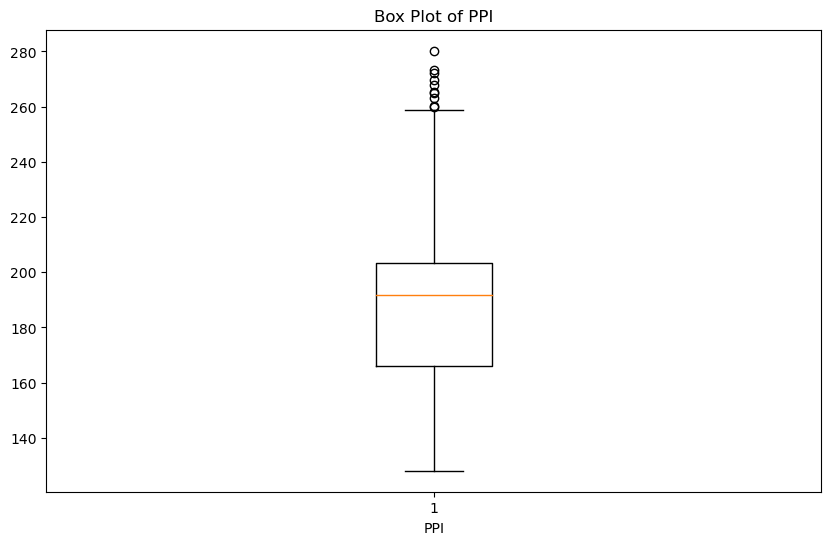

In [220]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_ppi)
plt.title('Box Plot of PPI')
plt.xlabel('PPI')
plt.show()

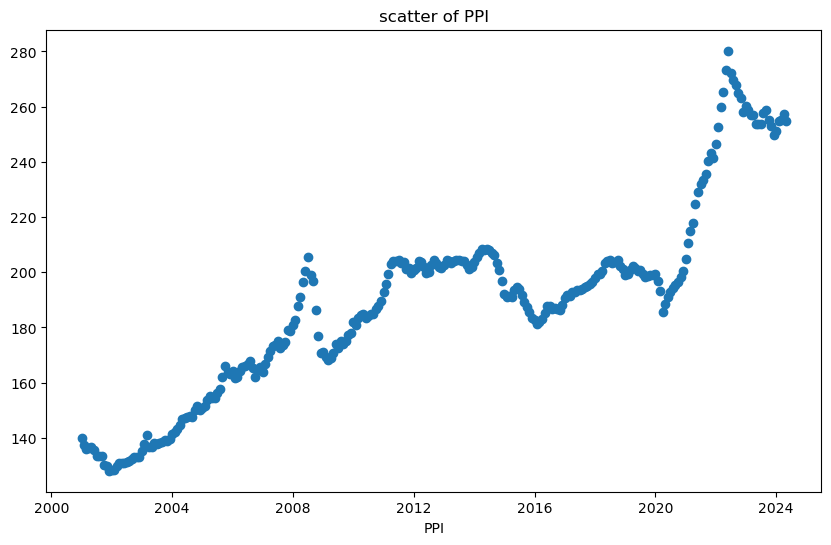

In [221]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_ppi.index,df_ppi.values)
plt.title('scatter of PPI')
plt.xlabel('PPI')
plt.show()

In [222]:
df_wg

,FRBATLWGTUMHWG83O
DATE,
2001-01-01,5.3
2001-02-01,5.4
2001-03-01,5.1
2001-04-01,5.4
2001-05-01,4.7
...,...
2023-11-01,5.1
2023-12-01,5.4
2024-01-01,4.7


In [223]:
df_wg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279 entries, 2001-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FRBATLWGTUMHWG83O  279 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [224]:
df_wg.replace('.',np.nan, inplace=True)

In [225]:
df_wg.isnull().sum()

FRBATLWGTUMHWG83O    0
dtype: int64

In [226]:
df_wg.head()

,FRBATLWGTUMHWG83O
DATE,
2001-01-01,5.3
2001-02-01,5.4
2001-03-01,5.1
2001-04-01,5.4
2001-05-01,4.7


In [227]:
df_wg['FRBATLWGTUMHWG83O'] = df_wg['FRBATLWGTUMHWG83O'].astype('float64')

In [228]:
check_outliers(df_wg, 'FRBATLWGTUMHWG83O')

,FRBATLWGTUMHWG83O
DATE,
2009-12-01,1.1
2022-01-01,6.1
2022-02-01,6.1
2022-04-01,6.3
2022-05-01,6.5
2022-06-01,7.4
2022-07-01,6.3
2022-08-01,6.3
2022-09-01,6.5


In [229]:
df_wg.describe()

,FRBATLWGTUMHWG83O
count,279.000000
mean,3.568459
std,1.137937
min,1.100000
25%,2.900000
50%,3.600000
75%,4.100000
max,7.400000


In [230]:
df_wg = df_wg.resample("Q").mean()

In [231]:
df_gpd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   A191RI1Q225SBEA_NBD19470401  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [232]:
check_outliers(df_gpd, 'A191RI1Q225SBEA_NBD19470401')

,A191RI1Q225SBEA_NBD19470401
DATE,
2020-04-01,-27.58621
2021-01-01,91.37931
2021-04-01,106.89655
2021-07-01,103.44828
2021-10-01,122.41379
2022-01-01,144.82759
2022-04-01,156.89655


In [233]:
df_gpd.describe()

,A191RI1Q225SBEA_NBD19470401
count,93.000000
mean,39.803485
std,28.709622
min,-27.586210
25%,24.137930
50%,36.206900
75%,50.000000
max,156.896550


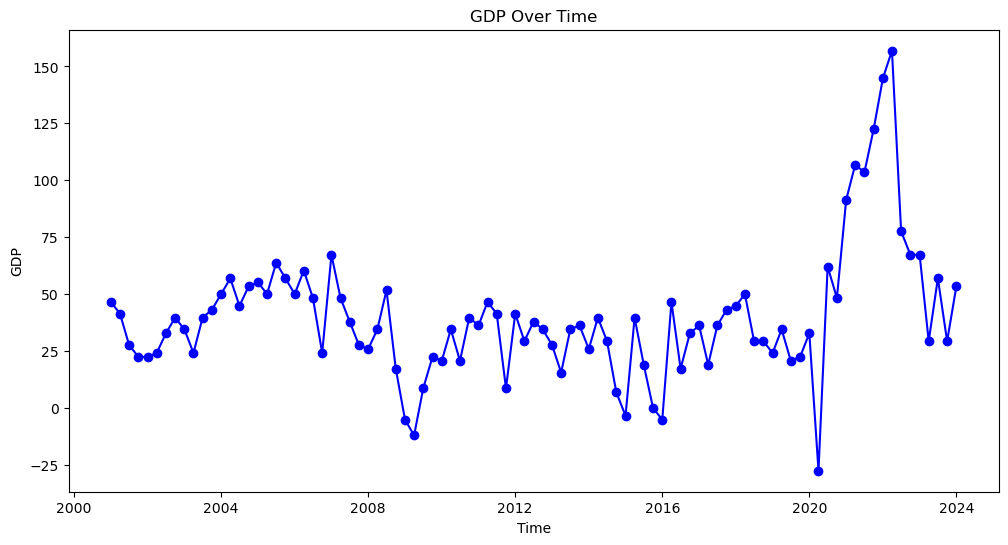

In [234]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df_gpd, marker='o', linestyle='-', color='b')
plt.title('GDP Over Time')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.show()

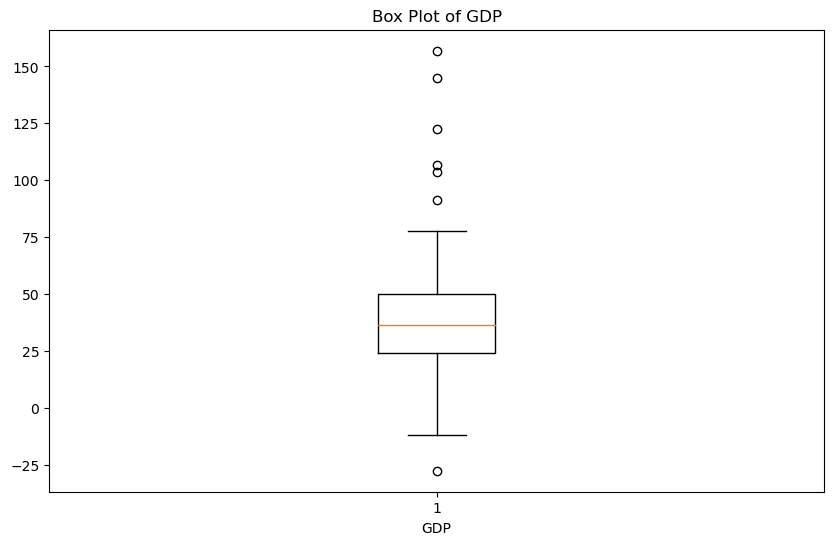

In [235]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_gpd)
plt.title('Box Plot of GDP')
plt.xlabel('GDP')
plt.show()

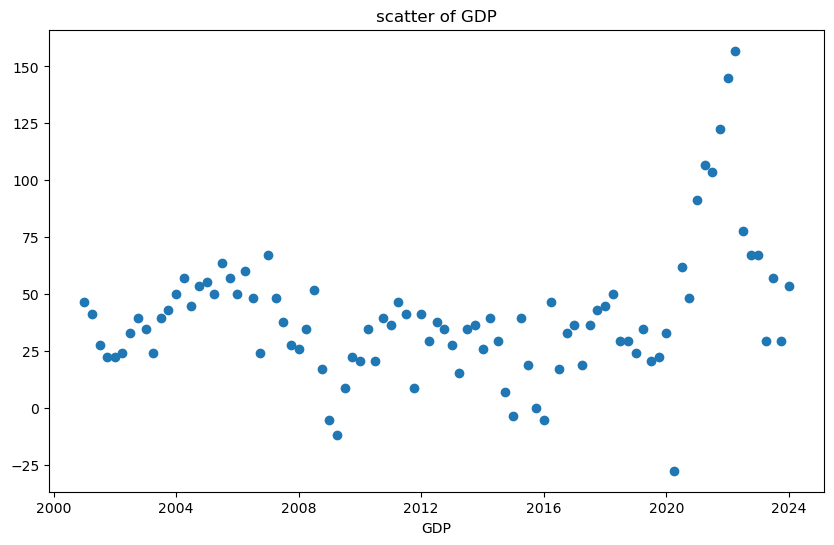

In [236]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_gpd.index,df_gpd.values)
plt.title('scatter of GDP')
plt.xlabel('GDP')
plt.show()

In [242]:

df_cpi

,CPIAUCSL
DATE,
2001-03-31,175.900000
2001-06-30,177.133333
2001-09-30,177.633333
2001-12-31,177.500000
2002-03-31,178.066667
...,...
2023-06-30,303.466667
2023-09-30,306.034333
2023-12-31,308.099000


In [243]:
df_csi

,UMCSENT
DATE,
2001-03-31,92.266667
2001-06-30,91.000000
2001-09-30,88.566667
2001-12-31,85.133333
2002-03-31,93.133333
...,...
2023-06-30,62.300000
2023-09-30,69.566667
2023-12-31,64.933333


In [244]:
df_merge = df_eci.join([df_cpi, df_csi,df_gpd,df_ipi,df_op,df_pce,df_ppi,df_wg])
df_merge.isnull().sum()

CIS1020000000000I               0
CPIAUCSL                        0
UMCSENT                         0
A191RI1Q225SBEA_NBD19470401    93
IR                              0
POILWTIUSDM                     0
PCE                             0
PPIACO                         93
FRBATLWGTUMHWG83O               0
dtype: int64

In [72]:
df_merge.columns = ['ECI', 'CPI', 'CSI', 'GDP', 'IPI','OP','PCE','PPI','WG']
df_merge

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2001-01-01,87.6,NaN,NaN,46.55172,NaN,NaN,NaN,140.000,NaN
2001-04-01,88.4,NaN,NaN,41.37931,NaN,NaN,NaN,136.400,NaN
2001-07-01,89.2,NaN,NaN,27.58621,NaN,NaN,NaN,133.400,NaN
2001-10-01,90.0,NaN,NaN,22.41379,NaN,NaN,NaN,130.300,NaN
2002-01-01,90.7,NaN,NaN,22.41379,NaN,NaN,NaN,128.500,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-01,157.1,NaN,NaN,67.24138,NaN,NaN,NaN,260.227,NaN
2023-04-01,158.7,NaN,NaN,29.31034,NaN,NaN,NaN,256.908,NaN
2023-07-01,160.4,NaN,NaN,56.89655,NaN,NaN,NaN,253.835,NaN


In [73]:
df_merge.shape

(93, 9)

In [74]:
df_merge.tail(30)

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2016-10-01,126.7,NaN,NaN,32.75862,NaN,NaN,NaN,186.700,NaN
2017-01-01,127.5,NaN,NaN,36.20690,NaN,NaN,NaN,190.700,NaN
2017-04-01,128.3,NaN,NaN,18.96552,NaN,NaN,NaN,193.000,NaN
2017-07-01,129.2,NaN,NaN,36.20690,NaN,NaN,NaN,193.500,NaN
2017-10-01,130.0,NaN,NaN,43.10345,NaN,NaN,NaN,194.900,NaN
2018-01-01,131.0,NaN,NaN,44.82759,NaN,NaN,NaN,197.900,NaN
2018-04-01,131.8,NaN,NaN,50.00000,NaN,NaN,NaN,200.300,NaN
2018-07-01,132.9,NaN,NaN,29.31034,NaN,NaN,NaN,204.300,NaN
2018-10-01,133.9,NaN,NaN,29.31034,NaN,NaN,NaN,204.600,NaN


In [75]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-01-01 to 2024-01-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ECI     93 non-null     float64
 1   CPI     0 non-null      float64
 2   CSI     0 non-null      float64
 3   GDP     93 non-null     float64
 4   IPI     0 non-null      float64
 5   OP      0 non-null      float64
 6   PCE     0 non-null      float64
 7   PPI     93 non-null     float64
 8   WG      0 non-null      float64
dtypes: float64(9)
memory usage: 9.3 KB


In [76]:
df_merge[df_merge.duplicated() == True]

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,


In [77]:
df_merge.describe()

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
count,93.000000,0.0,0.0,93.000000,0.0,0.0,0.0,93.000000,0.0
mean,118.801075,NaN,NaN,39.803485,NaN,NaN,NaN,187.983667,NaN
std,19.736600,NaN,NaN,28.709622,NaN,NaN,NaN,34.147023,NaN
min,87.600000,NaN,NaN,-27.586210,NaN,NaN,NaN,128.500000,NaN
25%,103.300000,NaN,NaN,24.137930,NaN,NaN,NaN,166.200000,NaN
50%,116.200000,NaN,NaN,36.206900,NaN,NaN,NaN,190.900000,NaN
75%,131.800000,NaN,NaN,50.000000,NaN,NaN,NaN,203.500000,NaN
max,163.900000,NaN,NaN,156.896550,NaN,NaN,NaN,272.274000,NaN


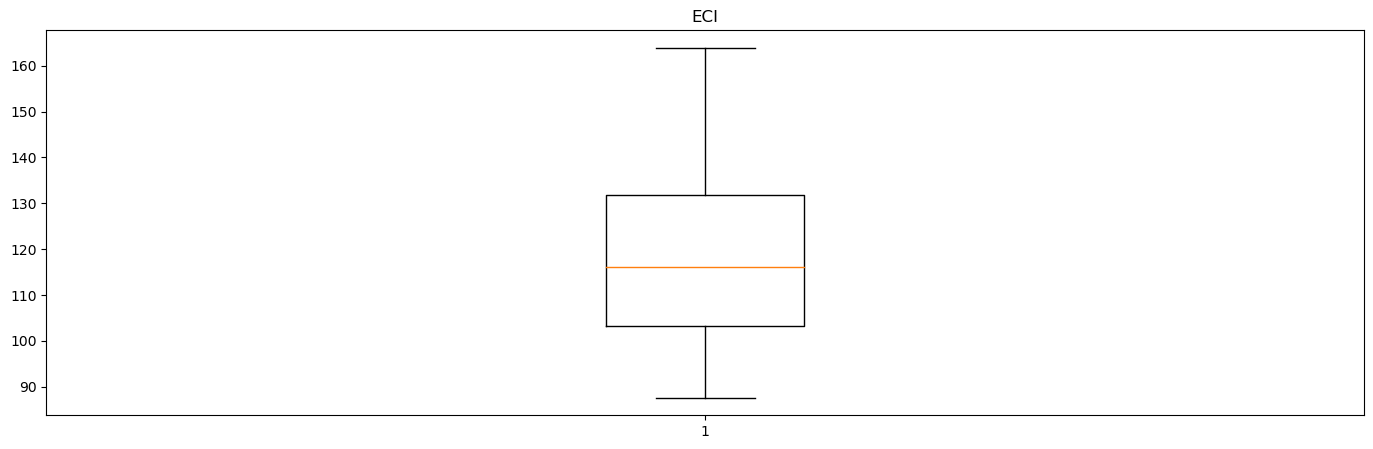

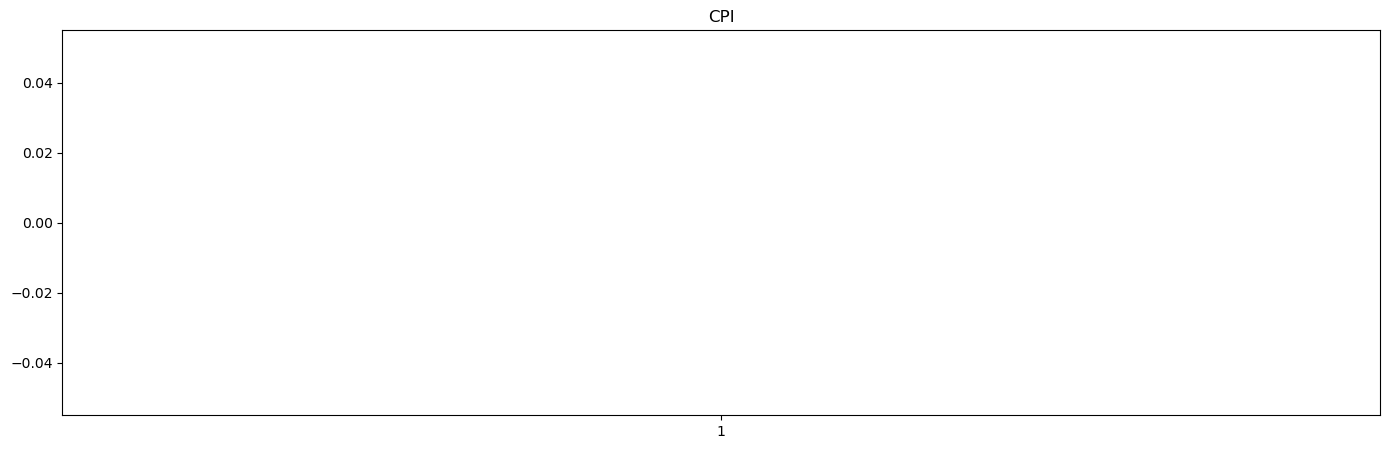

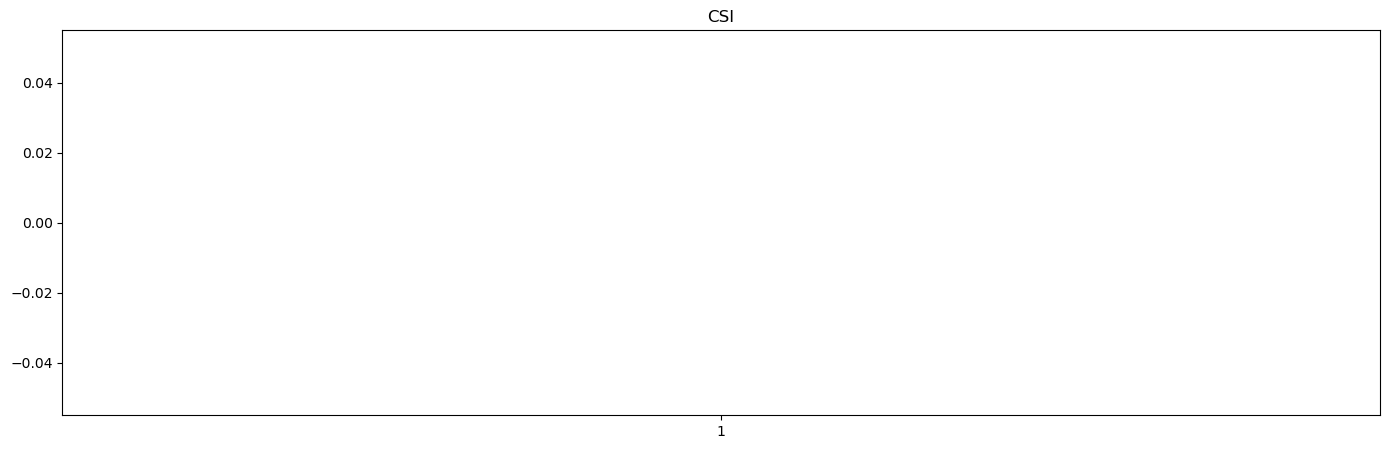

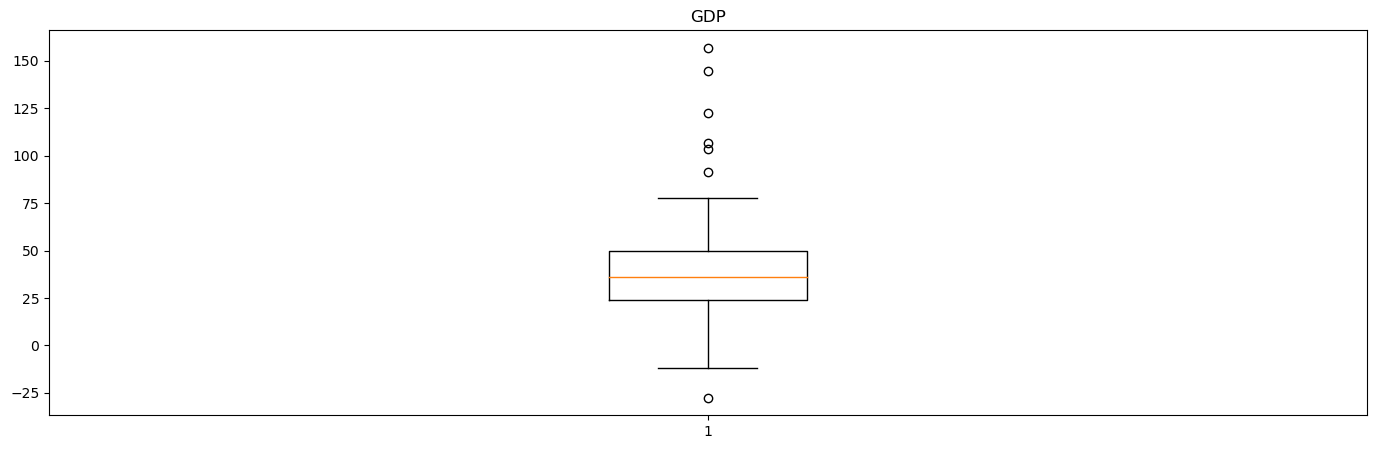

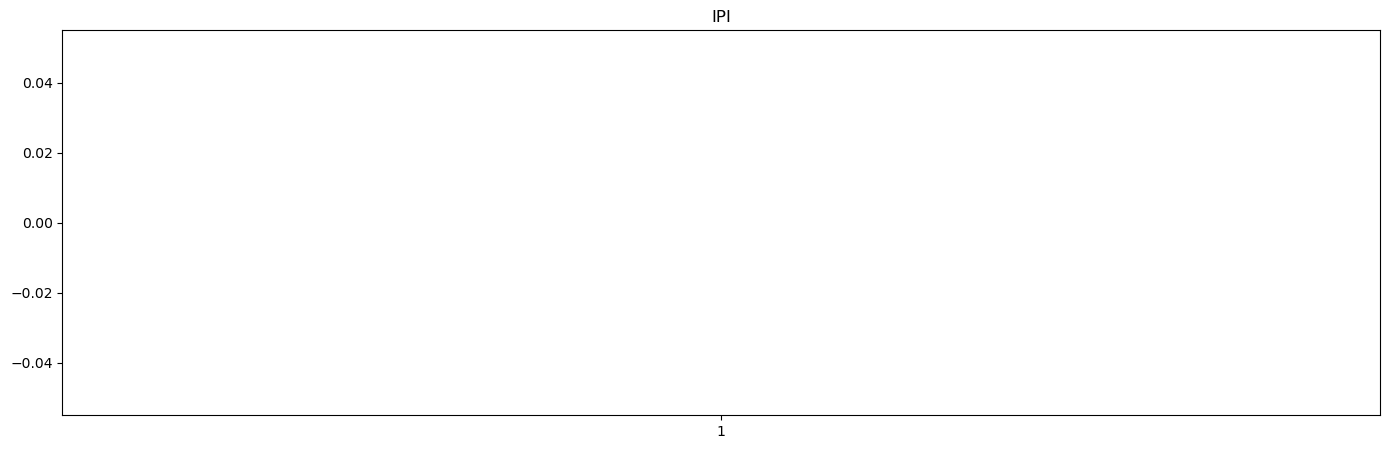

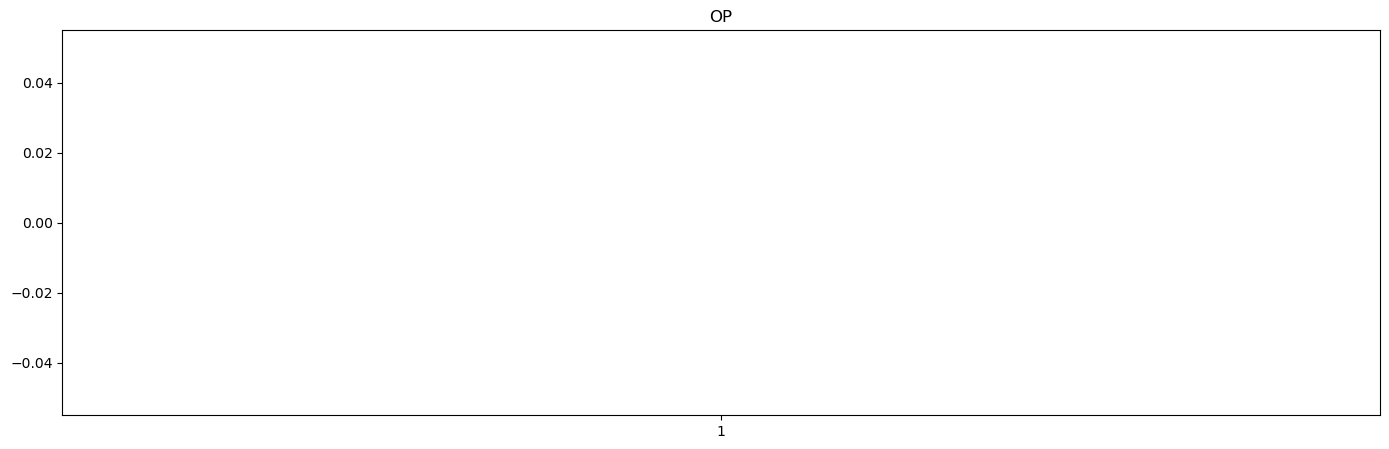

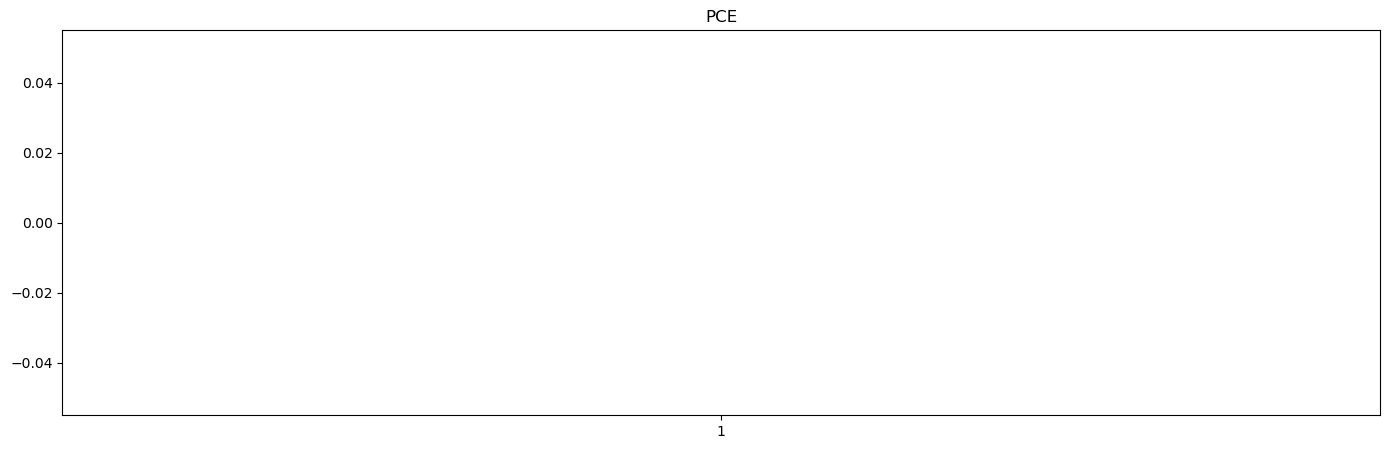

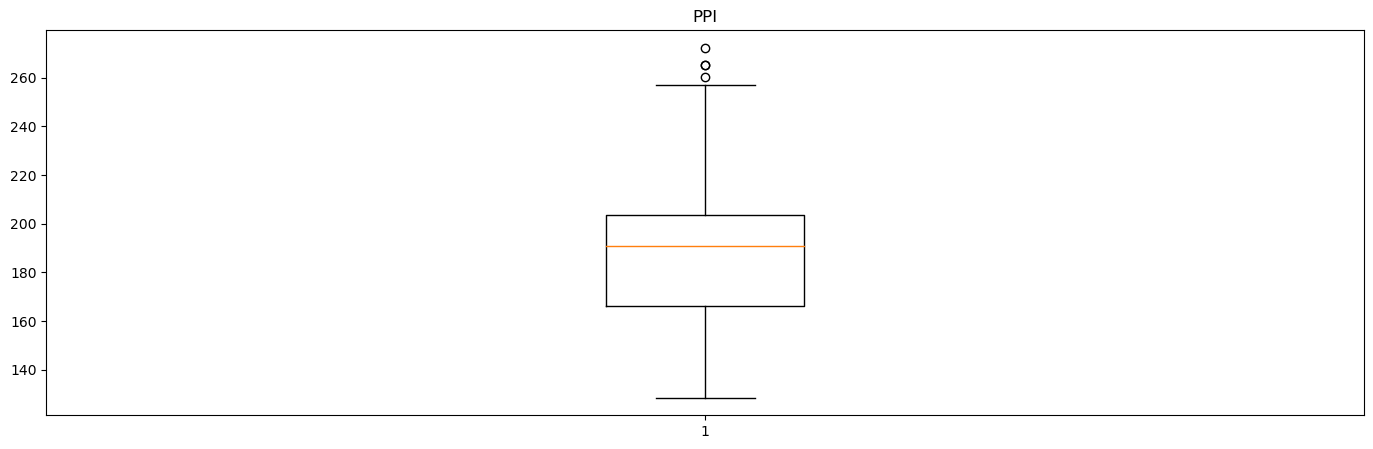

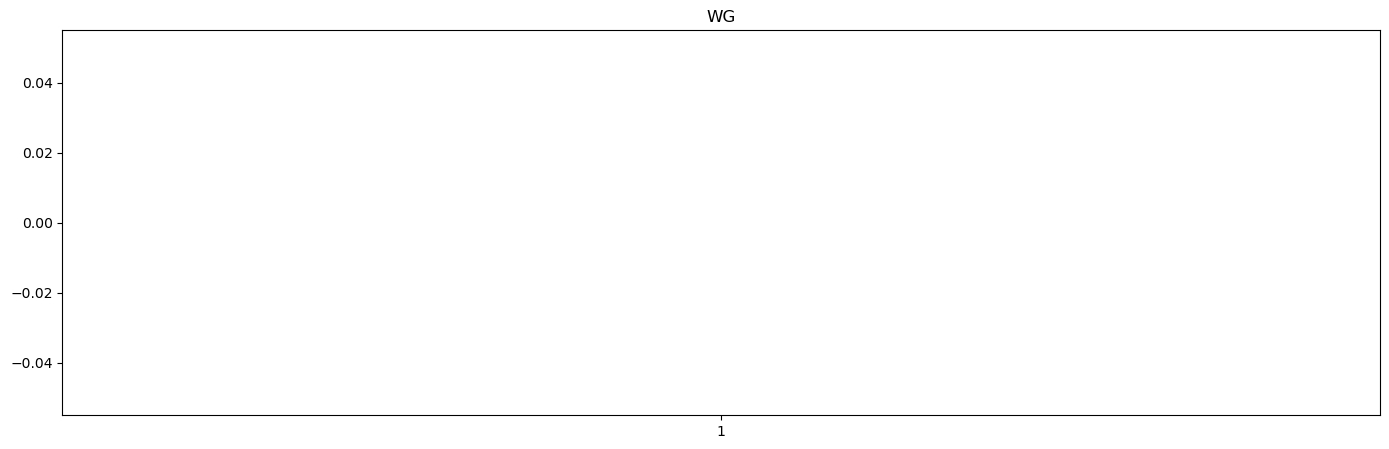

In [78]:
# plot box plot
for column in df_merge.columns:
    plt.figure(figsize=(17, 5))
    plt.boxplot(df_merge[column])
    plt.title(column.upper())
    plt.show()

In [79]:
check_outliers(df_merge, 'GDP')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2020-04-01,139.6,NaN,NaN,-27.58621,NaN,NaN,NaN,185.500,NaN
2021-01-01,142.9,NaN,NaN,91.37931,NaN,NaN,NaN,204.800,NaN
2021-04-01,144.1,NaN,NaN,106.89655,NaN,NaN,NaN,217.900,NaN
2021-07-01,146.1,NaN,NaN,103.44828,NaN,NaN,NaN,231.850,NaN
2021-10-01,147.8,NaN,NaN,122.41379,NaN,NaN,NaN,240.465,NaN
2022-01-01,149.6,NaN,NaN,144.82759,NaN,NaN,NaN,246.453,NaN
2022-04-01,151.7,NaN,NaN,156.89655,NaN,NaN,NaN,265.310,NaN


In [80]:
check_outliers(df_merge, 'PPI')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2022-04-01,151.7,NaN,NaN,156.89655,NaN,NaN,NaN,265.310,NaN
2022-07-01,153.5,NaN,NaN,77.58621,NaN,NaN,NaN,272.274,NaN
2022-10-01,155.3,NaN,NaN,67.24138,NaN,NaN,NaN,265.061,NaN
2023-01-01,157.1,NaN,NaN,67.24138,NaN,NaN,NaN,260.227,NaN


In [81]:
check_outliers(df_merge, 'WG')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,


In [82]:
corr_matric = df_merge.corr() 

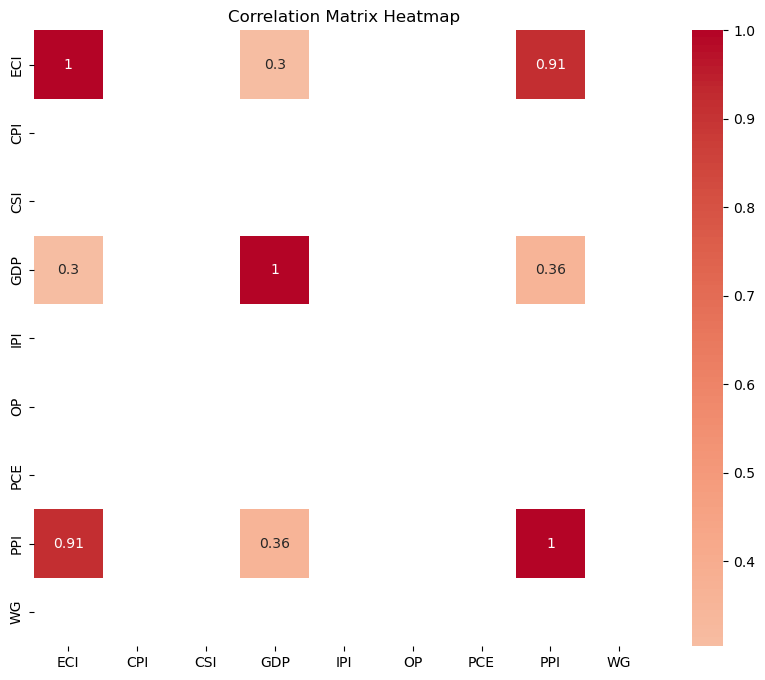

In [83]:
# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matric, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [84]:
#cpi and eci are strong correlation 

In [85]:
# Identify the indices with the strongest correlation with CPI
cpi_correlations = corr_matric['CPI'].sort_values(ascending=False)
print("Indices strongly correlated with CPI:\n", cpi_correlations)

Indices strongly correlated with CPI:
 ECI   NaN
CPI   NaN
CSI   NaN
GDP   NaN
IPI   NaN
OP    NaN
PCE   NaN
PPI   NaN
WG    NaN
Name: CPI, dtype: float64


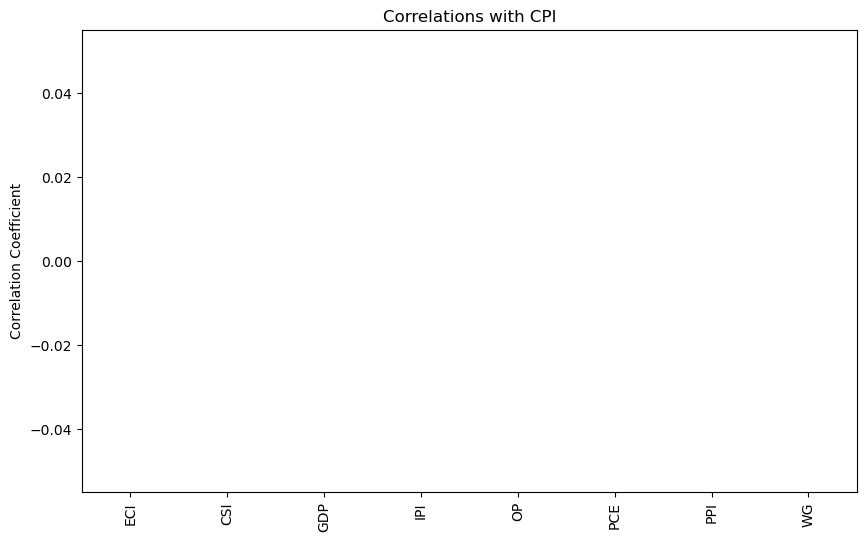

In [86]:
# Plotting the correlations with CPI
plt.figure(figsize=(10, 6))
cpi_correlations.drop('CPI').plot(kind='bar')
plt.title('Correlations with CPI')
plt.ylabel('Correlation Coefficient')
plt.show()

In [87]:
cpi_df = df_merge['CPI']
cpi_df.pct_change() * 100 

DATE
2001-01-01   NaN
2001-04-01   NaN
2001-07-01   NaN
2001-10-01   NaN
2002-01-01   NaN
              ..
2023-01-01   NaN
2023-04-01   NaN
2023-07-01   NaN
2023-10-01   NaN
2024-01-01   NaN
Name: CPI, Length: 93, dtype: float64

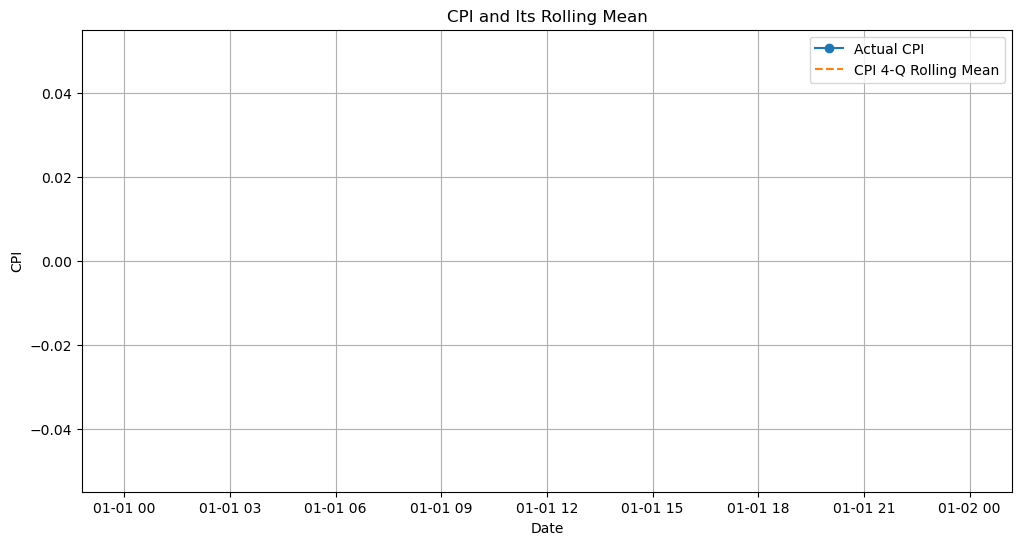

In [88]:


# Set window size for rolling mean
window_size = 4  # 12 months window

# Calculate rolling mean of CPI
df_merge['CPI_Rolling_Mean'] = df_merge['CPI'].rolling(window=window_size).mean()

# Plot actual CPI and its rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df_merge.index, df_merge['CPI'], label='Actual CPI', marker='o')
plt.plot(df_merge.index, df_merge['CPI_Rolling_Mean'], label=f'CPI {window_size}-Q Rolling Mean', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI and Its Rolling Mean')
plt.legend()
plt.grid(True)
plt.show()


In [89]:
df_merge.tail(10)

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG,CPI_Rolling_Mean
DATE,,,,,,,,,,
2021-10-01,147.8,NaN,NaN,122.41379,NaN,NaN,NaN,240.465,NaN,NaN
2022-01-01,149.6,NaN,NaN,144.82759,NaN,NaN,NaN,246.453,NaN,NaN
2022-04-01,151.7,NaN,NaN,156.89655,NaN,NaN,NaN,265.310,NaN,NaN
2022-07-01,153.5,NaN,NaN,77.58621,NaN,NaN,NaN,272.274,NaN,NaN
2022-10-01,155.3,NaN,NaN,67.24138,NaN,NaN,NaN,265.061,NaN,NaN
2023-01-01,157.1,NaN,NaN,67.24138,NaN,NaN,NaN,260.227,NaN,NaN
2023-04-01,158.7,NaN,NaN,29.31034,NaN,NaN,NaN,256.908,NaN,NaN
2023-07-01,160.4,NaN,NaN,56.89655,NaN,NaN,NaN,253.835,NaN,NaN
2023-10-01,162.1,NaN,NaN,29.31034,NaN,NaN,NaN,255.192,NaN,NaN
